In [1]:
# Common stuff

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)
import seaborn as sns

In [2]:
# Load data

df_texts = pd.read_csv('texts.csv')
df_texts['date'] = pd.to_datetime(df_texts['date'])
display(df_texts.head())
display(df_texts.info())
df_prices = pd.read_csv('gazprom_prices.csv', sep=';', decimal=',')
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
display(df_prices.head(5))
display(df_prices.info())

# Make sure all dates are unique

assert(df_texts['date'].nunique() == len(df_texts))
assert(df_prices['Date'].nunique() == len(df_prices))

,date,text
0,2017-09-11,Компания рассчитывает на решение по газовому с...
1,2017-08-11,"Как и предполагал “Ъ”, «Газпром», воспользова..."
2,2017-01-11,Новая редакция американских санкций ставит по...
3,2017-10-30,"Как стало известно “Ъ”, известный на рынке ри..."
4,2017-10-23,"НОВАТЭК, который через пять лет собирается за..."


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 2 columns):
date    1203 non-null datetime64[ns]
text    1203 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 28.2+ KB


None

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,2017-08-12,133.43,132.60,133.90,132.00,16037970
1,2017-07-12,133.70,133.02,133.87,132.81,18198430
2,2017-06-12,133.33,134.00,134.29,132.91,14641730
3,2017-05-12,133.48,133.65,133.99,132.78,12684800
4,2017-04-12,133.01,133.77,134.00,131.93,17818980


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1988 entries, 0 to 1987
Data columns (total 6 columns):
Date            1988 non-null datetime64[ns]
Open            1964 non-null float64
ClosingPrice    1988 non-null float64
DailyHigh       1986 non-null float64
DailyLow        1986 non-null float64
VolumePcs       1988 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 108.7 KB


None

In [3]:
### SKIP THIS comment block, approach with 'Open' below works better
## First, let's compare closing prices and set ClosingPrice_bin flag
## Note than we want to check as much as 3 days back because of holidays,
## i.e. monday news might influence the price, but last measurement comes from
## friday, not sunday
#df_res = df_texts.copy()
#for row in df_res.itertuples():
#    p2 = df_prices[df_prices['Date'] == row.date]
#    if not len(p2):
#        continue
#    p1 = df_prices[df_prices['Date'] == (row.date - pd.DateOffset(1))]
#    if not len(p1):
#        p1 = df_prices[df_prices['Date'] == (row.date - pd.DateOffset(2))]
#    if not len(p1):        
#        p1 = df_prices[df_prices['Date'] == (row.date - pd.DateOffset(3))]
#    if not len(p1):        
#        continue
#    diff = float(p2.iloc[0]['ClosingPrice']) - float(p1.iloc[0]['ClosingPrice'])
#    df_res.loc[row.Index, 'ClosingPrice_bin'] = 1 if diff >= 0 else 0
#    df_res.loc[row.Index, 'ClosingPrice'] = p2.iloc[0]['ClosingPrice']    

# First, let's compare prices and set ClosingPrice_bin flag
df_res = df_texts.copy()
for row in df_res.itertuples():
    p = df_prices[df_prices['Date'] == row.date]
    if not len(p):
        continue    
    diff = float(p.iloc[0]['ClosingPrice']) - float(p.iloc[0]['Open'])
    df_res.loc[row.Index, 'ClosingPrice_bin'] = 1 if diff >= 0 else 0
    df_res.loc[row.Index, 'ClosingPrice'] = p.iloc[0]['ClosingPrice']
    df_res['orig_text'] = df_res['text']
        
df_res.dropna(inplace = True)
df_res.reset_index(inplace = True, drop = True)
print("Dropped", len(df_texts) - len(df_res), "texts")
display(df_res.head(10))
display(df_res.info())

Dropped 44 texts


,date,text,ClosingPrice_bin,ClosingPrice,orig_text
0,2017-09-11,Компания рассчитывает на решение по газовому с...,0,131.50,Компания рассчитывает на решение по газовому с...
1,2017-08-11,"Как и предполагал “Ъ”, «Газпром», воспользова...",1,132.30,"Как и предполагал “Ъ”, «Газпром», воспользова..."
2,2017-01-11,Новая редакция американских санкций ставит по...,1,126.50,Новая редакция американских санкций ставит по...
3,2017-10-30,"Как стало известно “Ъ”, известный на рынке ри...",1,125.98,"Как стало известно “Ъ”, известный на рынке ри..."
4,2017-10-23,"НОВАТЭК, который через пять лет собирается за...",0,126.80,"НОВАТЭК, который через пять лет собирается за..."
5,2017-10-20,Российским прокатчикам второй раз за год приш...,1,126.70,Российским прокатчикам второй раз за год приш...
6,2017-10-13,«Газпром» может подписать контракт со Словени...,1,126.86,«Газпром» может подписать контракт со Словени...
7,2017-05-10,"«Газпром нефть», пробурившая первую скважину ...",1,123.50,"«Газпром нефть», пробурившая первую скважину ..."
8,2017-04-10,Спутниковый оператор «НТВ-плюс» в последнее в...,1,121.76,Спутниковый оператор «НТВ-плюс» в последнее в...
9,2017-09-29,"Как стало известно “Ъ”, конкуренты начинают р...",0,122.20,"Как стало известно “Ъ”, конкуренты начинают р..."


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 0 to 1158
Data columns (total 5 columns):
date                1159 non-null datetime64[ns]
text                1159 non-null object
ClosingPrice_bin    1159 non-null float64
ClosingPrice        1159 non-null float64
orig_text           1159 non-null object
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 54.3+ KB


None

In [4]:
# Let's make some preprocessing

import string
df_res.text = df_res.text.str.lower()
df_res.text = df_res.text.str.translate(dict.fromkeys(map(ord, string.punctuation)))

from nltk.corpus import stopwords
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д', '-', '-']

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
df_res.text = df_res.text.apply(remove_stopwords)   

from pymystem3 import Mystem
m = Mystem()
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()
    except:
        return " "
df_res.text = df_res.text.apply(lemmatize)

mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df_res.text = df_res.text.apply(remove_stoplemmas)
display(df_res.head(10))

,date,text,ClosingPrice_bin,ClosingPrice,orig_text
0,2017-09-11,компания рассчитывать решение газовый спор укр...,0,131.50,Компания рассчитывает на решение по газовому с...
1,2017-08-11,предполагать “ъ” «газпром» воспользоваться жал...,1,132.30,"Как и предполагал “Ъ”, «Газпром», воспользова..."
2,2017-01-11,новый редакция американский санкция ставить уг...,1,126.50,Новая редакция американских санкций ставит по...
3,2017-10-30,становиться известно “ъ” известный рынок рискм...,1,125.98,"Как стало известно “Ъ”, известный на рынке ри..."
4,2017-10-23,новатэк пять год собираться запускать камчатка...,0,126.80,"НОВАТЭК, который через пять лет собирается за..."
5,2017-10-20,российский прокатчик второй год приходиться ра...,1,126.70,Российским прокатчикам второй раз за год приш...
6,2017-10-13,«газпром» подписывать контракт словения постав...,1,126.86,«Газпром» может подписать контракт со Словени...
7,2017-05-10,«газпром нефть» пробуривать первый скважина ая...,1,123.50,"«Газпром нефть», пробурившая первую скважину ..."
8,2017-04-10,спутниковый оператор «нтвплюс» последний время...,1,121.76,Спутниковый оператор «НТВ-плюс» в последнее в...
9,2017-09-29,становиться известно “ъ” конкурент начинать ра...,0,122.20,"Как стало известно “Ъ”, конкуренты начинают р..."


Correlation is 0.0148547985936


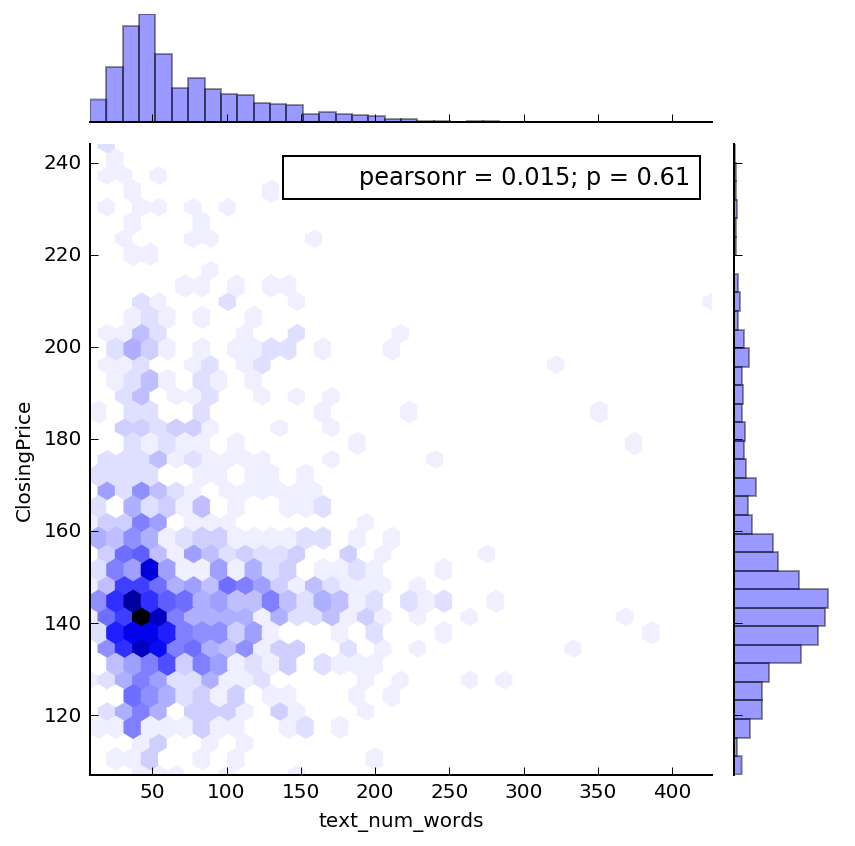

In [5]:
# Let's see if there's any correlation between text length and closing price

import re
import scipy

df_res["text_num_words"] = df_res["text"].apply(lambda x: len(re.split("[\ \\t]+", x)))

sns.jointplot(x='text_num_words', y='ClosingPrice', data=df_res, kind='hex');

corr = scipy.stats.pearsonr(df_res["text_num_words"], df_res["ClosingPrice"])
print("Correlation is",corr[0])

# Looks like "no"

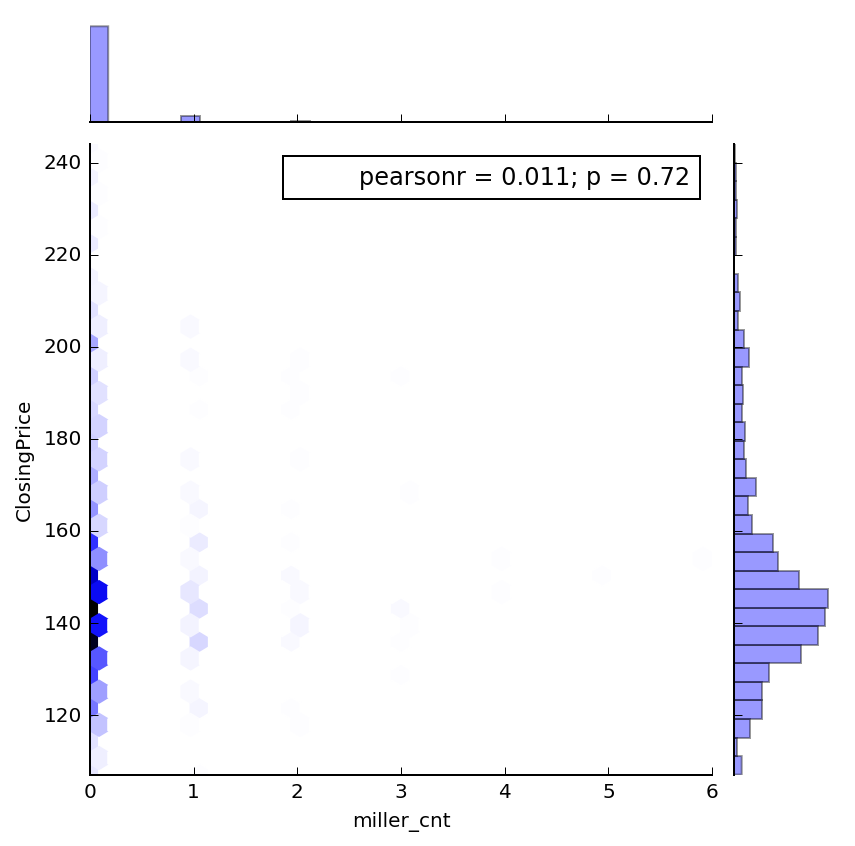

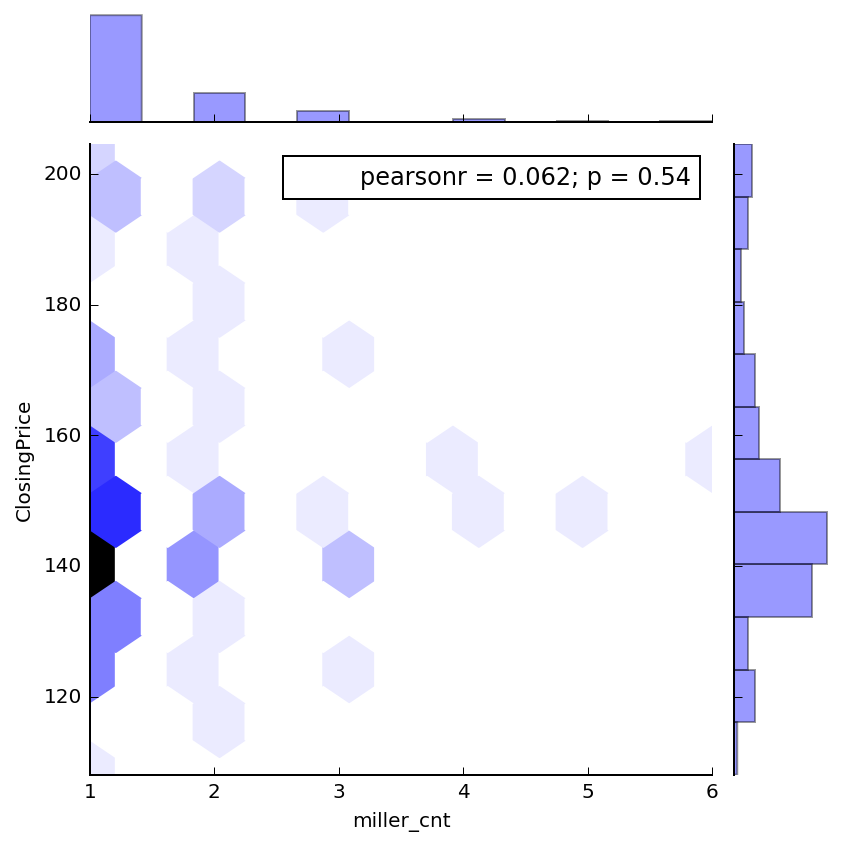

In [6]:
# Let's see if there's any correlation between Miller mentions and closing price
# Note that our text is already lowercased, so we can just search for "миллер", it'll
# find all stuff like "миллера", etc.

df_res["miller_cnt"] = df_res["text"].apply(lambda x: len(re.findall('миллер', x)))
sns.jointplot(x='miller_cnt', y='ClosingPrice', data=df_res, kind='hex');

# Looks like "no", let's drop all lines with 0 count and check again

sns.jointplot(x='miller_cnt', y='ClosingPrice', data=df_res[df_res["miller_cnt"] > 0], kind='hex');

# Still no

In [7]:
# Let's see which stream is mentioned the most

from sklearn.feature_extraction.text import CountVectorizer

c = CountVectorizer(ngram_range=(2, 2))
c.fit(df_res["text"])

print('северный поток', c.vocabulary_['северный поток'])
print('турецкий поток', c.vocabulary_['турецкий поток'])

# Now let's output which sanctions are talked about

print('\nsanctions:')

from pymorphy2 import MorphAnalyzer

m = MorphAnalyzer()

for s in c.vocabulary_:
    if s.split()[1] == 'санкция':        
        if 'ADJF' in m.parse(s.split()[0])[0].tag:
            print(s)

северный поток 41890
турецкий поток 48368

sanctions:
международный санкция
американский санкция
экономический санкция
секторальный санкция
очередной санкция
антироссийский санкция
западный санкция
финансовый санкция
персональный санкция
штрафной санкция


In [8]:
# Now, let's make a classifier, let's start with a simple one first: naive bayes

# Let's make a train/test split first

df_train = df_res[df_res['date'] < pd.Timestamp('2016-01-01')]
df_test = df_res[df_res['date'] >= pd.Timestamp('2016-01-01')]

df_train.reset_index(inplace=True, drop=True)
df_test.reset_index(inplace=True, drop=True)

display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 900
Data columns (total 7 columns):
date                901 non-null datetime64[ns]
text                901 non-null object
ClosingPrice_bin    901 non-null float64
ClosingPrice        901 non-null float64
orig_text           901 non-null object
text_num_words      901 non-null int64
miller_cnt          901 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 56.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 257
Data columns (total 7 columns):
date                258 non-null datetime64[ns]
text                258 non-null object
ClosingPrice_bin    258 non-null float64
ClosingPrice        258 non-null float64
orig_text           258 non-null object
text_num_words      258 non-null int64
miller_cnt          258 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 16.1+ KB


None

In [9]:
# Let's train and make a prediction using single word count vectorizer

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from sklearn.feature_extraction.text import *

clf = Pipeline([
    ('el1', CountVectorizer(ngram_range=(1, 1))),
    ('el2', MultinomialNB()),
])

clf.fit(df_train.text, df_train.ClosingPrice_bin)

predictions = clf.predict(df_test.text)

print("F1-measure: {0:6.2f}".format(f1_score(df_test.ClosingPrice_bin, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(df_test.ClosingPrice_bin, predictions)))
print(classification_report(df_test.ClosingPrice_bin, predictions))

# And we get 0.47, this is pretty much expected, gas prices are complex beasts, predicting those
# with high accuracy is hard, especially using news only, especially using simple models such as this one.
# Let's try to improve

F1-measure:   0.47
Accuracy:   0.47
             precision    recall  f1-score   support

        0.0       0.51      0.52      0.52       140
        1.0       0.42      0.42      0.42       118

avg / total       0.47      0.47      0.47       258



In [10]:
# Let's use tf-idf, also, let's use grid search

from sklearn.model_selection import GridSearchCV

clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),    
    ('clf', MultinomialNB()),
])

parameters = {
    'vect__ngram_range': [(1, 1), (1, 3), (2, 2), (2, 4)],    
    'clf__alpha': (0.001, 0.01, 0.1, 1, 2),
    'tfidf__use_idf': (True, False)
}

clf = GridSearchCV(clf, parameters, scoring='f1', cv=5, n_jobs=-1)

clf.fit(df_train.text, df_train.ClosingPrice_bin)

display(clf.best_estimator_)

predictions = clf.best_estimator_.predict(df_test.text)

print("F1-measure: {0:6.2f}".format(f1_score(df_test.ClosingPrice_bin, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(df_test.ClosingPrice_bin, predictions)))
print(classification_report(df_test.ClosingPrice_bin, predictions))

# Looks better :)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True))])

F1-measure:   0.50
Accuracy:   0.51
             precision    recall  f1-score   support

        0.0       0.54      0.59      0.57       140
        1.0       0.46      0.41      0.43       118

avg / total       0.50      0.51      0.50       258



In [11]:
# Let's try SVC with SVD

from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC

clf = Pipeline([    
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),        
    ('reducer', TruncatedSVD()),
    ('clf', SVC(probability=True))
])

parameters = {
    'vect__ngram_range': [(1, 1)],
    'reducer__n_components': [100],
    'clf__C': [150],
    'clf__gamma': [0.002, 0.02],
}

clf = GridSearchCV(clf, parameters, scoring='f1', cv=5, n_jobs=-1)

clf.fit(df_train.text, df_train.ClosingPrice_bin)

display(clf.best_estimator_)

predictions = clf.best_estimator_.predict(df_test.text)

print("F1-measure: {0:6.2f}".format(f1_score(df_test.ClosingPrice_bin, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(df_test.ClosingPrice_bin, predictions)))
print(classification_report(df_test.ClosingPrice_bin, predictions))

# I've been playing around with SVD and different classifiers, it's not getting better, m.b.
# it's time to move on

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

F1-measure:   0.46
Accuracy:   0.48
             precision    recall  f1-score   support

        0.0       0.52      0.64      0.57       140
        1.0       0.41      0.30      0.34       118

avg / total       0.47      0.48      0.47       258



In [21]:
# Let's try fasttext, let's do this on original text first

import fasttext

with open ('train.txt', 'w') as f:
    for s in range(len(df_train.orig_text)):        
        l = df_train.orig_text[s] + ' __label__' + str(df_train.ClosingPrice_bin.iloc[s]) + '\n'
        f.write(l)
                
with open ('test.txt', 'w') as f1:
    for s in range(len(df_test.orig_text)):        
        l = df_test.orig_text[s] + ' __label__' + str(df_test.ClosingPrice_bin[s]) + '\n'
        f1.write(l)
        
classifier = fasttext.supervised('train.txt', 'model')

result = classifier.test('test.txt')

print ('Precision orig', result.precision)
print ('Recall orig', result.recall)

# And now on preprocessed

with open ('train.txt', 'w') as f:
    for s in range(len(df_train.text)):        
        l = df_train.text[s] + ' __label__' + str(df_train.ClosingPrice_bin.iloc[s]) + '\n'
        f.write(l)
                
with open ('test.txt', 'w') as f1:
    for s in range(len(df_test.text)):        
        l = df_test.text[s] + ' __label__' + str(df_test.ClosingPrice_bin[s]) + '\n'
        f1.write(l)
        
classifier = fasttext.supervised('train.txt', 'model')

result = classifier.test('test.txt')

print ('\nPrecision', result.precision)
print ('Recall', result.recall)

# Much better, it's actually better on original text

Precision orig 0.5465116279069767
Recall orig 0.5465116279069767

Precision 0.5193798449612403
Recall 0.5193798449612403
